In [1]:
import pandas as pd
import numpy as np
print('Service libraries imported')

Service libraries imported


In [2]:
import warnings
warnings.filterwarnings('ignore')

In [13]:
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
print('Classifiers imported')

Classifiers imported


In [4]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score,f1_score
print('Metrics imported')

Metrics imported


In [5]:
from sklearn.model_selection import GridSearchCV
print('Grid search imported')

Grid search imported


In [6]:
import seaborn as sns
import matplotlib.pyplot as plt


In [7]:
df=pd.read_csv('Shuffled_dataset_kegg.csv')

In [8]:
df.head(5)

,hsa00010,hsa00020,hsa00030,hsa00040,hsa00071,hsa00100,hsa00130,hsa00140,hsa00190,hsa00220,...,hsa05230,hsa05231,hsa05235,hsa05323,hsa05410,hsa05412,hsa05414,hsa05416,hsa05418,Class
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


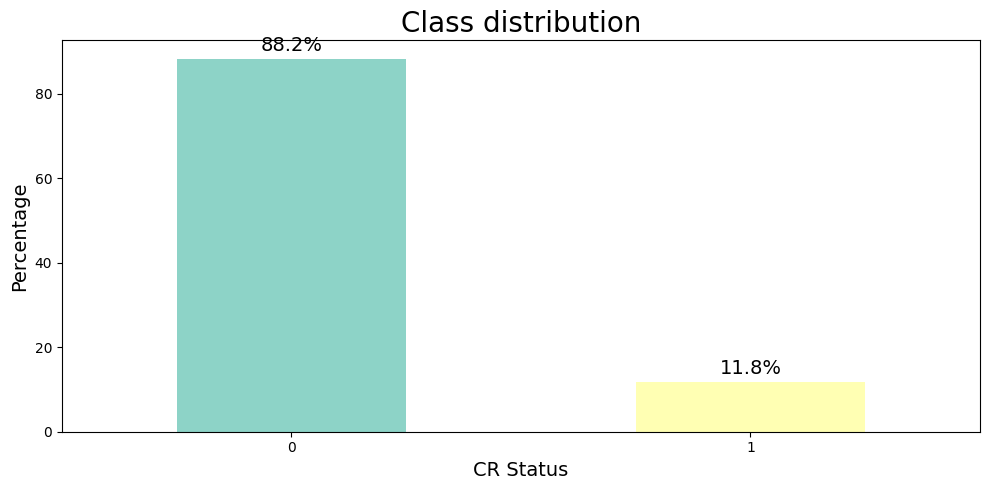

In [9]:
# Calculate class distribution percentages
class_distribution = df['Class'].value_counts(normalize=True) * 100

# Create a color palette with different colors for each bar
color_palette = plt.cm.Set3.colors[:len(class_distribution)]

# Create a bar plot
ax = class_distribution.plot(kind='bar', figsize=(10, 5), color=color_palette)

# Annotate the bars with percentages
for p in ax.patches:
    percentage = '{:.1f}%'.format(p.get_height())
    ax.annotate(percentage, (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=14)

# Customize plot labels and title
plt.title('Class distribution', fontsize=20)
plt.xlabel('CR Status', fontsize=14)
plt.ylabel('Percentage', fontsize=14)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()








In [27]:
#split the df into 10 equal parts for manual cross validation
total_rows = len(df)
size_of_each_part = total_rows // 10
remainder = total_rows % 10

# Step 2: Split the DataFrame into 10 equal parts
dfs = []
start_index = 0
for i in range(10):
    end_index = start_index + size_of_each_part + (1 if i < remainder else 0)
    part_df = df.iloc[start_index:end_index].reset_index(drop=True)
    dfs.append(part_df)
    start_index = end_index

In [11]:
import time

In [12]:
from sklearn.metrics import confusion_matrix

In [14]:
#APPLICATION OF MACHINE LEARNING ALGORITHMS TO DEFAULT ATTRIBUTES
start_time = time.time()

# Initialize the dictionary to store metrics for each classifier
brf_metrics_dict = {}
rf_metrics_dict = {}
xgb_metrics_dict = {}

columns=list(df.columns)
# Loop through the dfs list for cross-validation
for i in range(len(dfs)):
    df_test=dfs[i]
    # Combine all DataFrames except the current DataFrame to create the training and validation sets
    train_val_dfs = [df for df in dfs if df is not df_test]
    df_train_val = pd.concat(train_val_dfs, ignore_index=True)

    # Split the combined DataFrame into X and y for training
    X_train_val = df_train_val.drop(columns=['Class'])
    y_train_val = df_train_val['Class']

    # Split the test DataFrame into X and y
    X_test = df_test.drop(columns=['Class'])
    y_test = df_test['Class']

    # Create the parameter grid for BalancedRandomForestClassifier
    brf_param_grid = {
        'n_estimators': [500],
        'max_depth': [None, 10, 20],
        'max_features': ['sqrt','sqrt*2','sqrt/2']
    }

    # Create the GridSearchCV instance for BRF
    brf_classifier = GridSearchCV(BalancedRandomForestClassifier(), brf_param_grid, cv=5, scoring='accuracy')

    # Train the brf classifier using the training and validation data
    brf_classifier.fit(X_train_val, y_train_val)

    # Predict the labels for the test set
    y_test_pred = brf_classifier.predict(X_test)

    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_test_pred)
    precision = precision_score(y_test, y_test_pred)
    recall = recall_score(y_test, y_test_pred)
    roc_auc = roc_auc_score(y_test, y_test_pred)
    f1 = f1_score(y_test,y_test_pred)
    conf_matrix = confusion_matrix(y_test, y_test_pred)
    # Store the metrics in the metrics_dict using a unique identifier (e.g., classifier name) as the key
    brf_metrics_dict[f"brf_classifier_{i}"] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'ROC AUC': roc_auc,
        'F1': f1,
        'Confusion Matrix': conf_matrix
    }

    # Print individual metrics for the current fold
    print(f"Metrics for brf_classifier_{i}:")
    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"ROC AUC: {roc_auc}")
    print(f"F1: {f1}")
    print()

    # Create the parameter grid for RandomForestClassifier
    rf_param_grid = {
        'n_estimators': [500],
        'max_depth': [None, 10, 20],
        'max_features': ['sqrt','sqrt*2','sqrt/2']

    }

    # Create the GridSearchCV instance for RF
    rf_classifier = GridSearchCV(RandomForestClassifier(), rf_param_grid, cv=5, scoring='accuracy')

    # Train the brf classifier using the training and validation data
    rf_classifier.fit(X_train_val, y_train_val)

    # Predict the labels for the test set
    y_test_pred = rf_classifier.predict(X_test)

    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_test_pred)
    precision = precision_score(y_test, y_test_pred)
    recall = recall_score(y_test, y_test_pred)
    roc_auc = roc_auc_score(y_test, y_test_pred)
    f1 = f1_score(y_test,y_test_pred)
    conf_matrix = confusion_matrix(y_test, y_test_pred)

    # Store the metrics in the metrics_dict using a unique identifier (e.g., classifier name) as the key
    rf_metrics_dict[f"rf_classifier_{i}"] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'ROC AUC': roc_auc,
        'F1': f1,
        'Confusion Matrix': conf_matrix
    }

    # Print individual metrics for the current fold
    print(f"Metrics for rf_classifier_{i}:")
    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"ROC AUC: {roc_auc}")
    print(f"F1: {f1}")
    print()


    # Create the parameter grid for XGB classifier
    xgb_param_grid = {
        'n_estimators': [500],
        'max_depth': [None, 5, 10],
        'colsample_bytree': [0.6, 0.8,1.0]
    }

    # Create the GridSearchCV instance for XGB
    xgb_classifier = GridSearchCV(xgb.XGBClassifier(), xgb_param_grid, cv=5, scoring='accuracy')

    # Train the brf classifier using the training and validation data
    xgb_classifier.fit(X_train_val, y_train_val)

    # Predict the labels for the test set
    y_test_pred = xgb_classifier.predict(X_test)

    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_test_pred)
    precision = precision_score(y_test, y_test_pred)
    recall = recall_score(y_test, y_test_pred)
    roc_auc = roc_auc_score(y_test, y_test_pred)
    f1 = f1_score(y_test,y_test_pred)
    conf_matrix = confusion_matrix(y_test, y_test_pred)

    # Store the metrics in the metrics_dict using a unique identifier (e.g., classifier name) as the key
    xgb_metrics_dict[f"xgb_classifier_{i}"] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'ROC AUC': roc_auc,
        'F1': f1,
        'Confusion Matrix': conf_matrix
    }

    # Print individual metrics for the current fold
    print(f"Metrics for xgb_classifier_{i}:")
    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"ROC AUC: {roc_auc}")
    print(f"F1: {f1}")
    print()

# Calculate average metrics across all folds for brf
brf_average_metrics = {metric_name: np.mean([metrics[metric_name] for metrics in brf_metrics_dict.values()])
                   for metric_name in brf_metrics_dict[next(iter(brf_metrics_dict))].keys()}

# Print the average metrics
print("Average Metrics BRF:")
for metric_name, metric_value in brf_average_metrics.items():
    print(f"{metric_name}: {metric_value}")
print()
# Calculate average metrics across all folds for rf
rf_average_metrics = {metric_name: np.mean([metrics[metric_name] for metrics in rf_metrics_dict.values()])
                   for metric_name in rf_metrics_dict[next(iter(rf_metrics_dict))].keys()}

# Print the average metrics
print("Average Metrics RF:")
for metric_name, metric_value in rf_average_metrics.items():
    print(f"{metric_name}: {metric_value}")
print()
# Calculate average metrics across all folds for xgb
xgb_average_metrics = {metric_name: np.mean([metrics[metric_name] for metrics in xgb_metrics_dict.values()])
                   for metric_name in xgb_metrics_dict[next(iter(xgb_metrics_dict))].keys()}

# Print the average metrics
print("Average Metrics XGB:")
for metric_name, metric_value in xgb_average_metrics.items():
    print(f"{metric_name}: {metric_value}")
print()

# Access the best estimators for each classifier
best_brf_estimator = brf_classifier.best_estimator_
best_rf_estimator = rf_classifier.best_estimator_
best_xgb_estimator = xgb_classifier.best_estimator_

end_time = time.time()
duration = end_time - start_time
print(f'This block executed in: {duration/60} minutes')

Metrics for brf_classifier_0:
Accuracy: 0.875
Precision: 0.4444444444444444
Recall: 1.0
ROC AUC: 0.9305555555555556
F1: 0.6153846153846153

Metrics for rf_classifier_0:
Accuracy: 0.9125
Precision: 1.0
Recall: 0.125
ROC AUC: 0.5625
F1: 0.2222222222222222

Metrics for xgb_classifier_0:
Accuracy: 0.9375
Precision: 0.7142857142857143
Recall: 0.625
ROC AUC: 0.7986111111111112
F1: 0.6666666666666666

Metrics for brf_classifier_1:
Accuracy: 0.775
Precision: 0.2857142857142857
Recall: 0.6666666666666666
ROC AUC: 0.7276995305164319
F1: 0.4

Metrics for rf_classifier_1:
Accuracy: 0.925
Precision: 0.6666666666666666
Recall: 0.6666666666666666
ROC AUC: 0.812206572769953
F1: 0.6666666666666666

Metrics for xgb_classifier_1:
Accuracy: 0.925
Precision: 0.6666666666666666
Recall: 0.6666666666666666
ROC AUC: 0.812206572769953
F1: 0.6666666666666666

Metrics for brf_classifier_2:
Accuracy: 0.7375
Precision: 0.22727272727272727
Recall: 0.5555555555555556
ROC AUC: 0.6580594679186228
F1: 0.3225806451612903

In [22]:
# Access the best estimator for each classifier
best_brf_estimator = brf_classifier.best_estimator_
best_rf_estimator = rf_classifier.best_estimator_
best_xgb_estimator = xgb_classifier.best_estimator_

# Display the hyperparameters of the best BalancedRandomForestClassifier
print("Best Hyperparameters for Balanced Random Forest:")
print(best_brf_estimator.get_params())
print()

# Display the hyperparameters of the best RandomForestClassifier
print("Best Hyperparameters for Random Forest:")
print(best_rf_estimator.get_params())
print()

# Display the hyperparameters of the best XGBoostClassifier
print("Best Hyperparameters for XGBoost:")
print(best_xgb_estimator.get_params())


Best Hyperparameters for Balanced Random Forest:
{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 10, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 500, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'replacement': False, 'sampling_strategy': 'auto', 'verbose': 0, 'warm_start': False}

Best Hyperparameters for Random Forest:
{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 20, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 500, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}

Best Hyperparameters for XGBoost:
{'objective': 'binary:logistic', 'use_labe

In [19]:
# Initialize dictionaries to store summed confusion matrices for each classifier
brf_sum_conf_matrix = np.zeros((2, 2))
rf_sum_conf_matrix = np.zeros((2, 2))
xgb_sum_conf_matrix = np.zeros((2, 2))

# Loop through the metrics dictionaries and accumulate confusion matrices
for metrics_dict in [brf_metrics_dict, rf_metrics_dict, xgb_metrics_dict]:
    for key, metrics in metrics_dict.items():
        conf_matrix = metrics.get('Confusion Matrix', None)
        if conf_matrix is not None:
            if 'brf' in key:
                brf_sum_conf_matrix += conf_matrix
            elif 'rf' in key:
                rf_sum_conf_matrix += conf_matrix
            elif 'xgb' in key:
                xgb_sum_conf_matrix += conf_matrix

# Print summed confusion matrices
print("Summed Confusion Matrix for BRF:")
print(brf_sum_conf_matrix)

print("Summed Confusion Matrix for RF:")
print(rf_sum_conf_matrix)

print("Summed Confusion Matrix for XGB:")
print(xgb_sum_conf_matrix)


Summed Confusion Matrix for BRF:
[[589. 116.]
 [ 46.  48.]]
Summed Confusion Matrix for RF:
[[695.  10.]
 [ 68.  26.]]
Summed Confusion Matrix for XGB:
[[678.  27.]
 [ 58.  36.]]


In [23]:
from math import log2
import math as math

# Function to calculate entropy
def calculate_entropy(labels):
    # Get the unique labels and their counts
    unique_labels, label_counts = np.unique(labels, return_counts=True)
    total_samples = len(labels)
    entropy = 0

    # Calculate the entropy for each label
    for count in label_counts:
        probability = count / total_samples
        entropy -= probability * log2(probability)

    return entropy

# Function to calculate information gain
def calculate_information_gain(df, Class):
    information_gains = {}

    # Iterate over each attribute column in the DataFrame
    for attribute in df.columns:
        if attribute != Class:
            attribute_values = df[attribute].unique()
            attribute_entropy = 0

            # Calculate the entropy for each attribute value
            for value in attribute_values:
                subset = df[df[attribute] == value]
                subset_entropy = calculate_entropy(subset[Class])
                subset_probability = len(subset) / len(df)
                attribute_entropy += subset_probability * subset_entropy

            # Calculate the entropy of the target class
            Class_entropy = calculate_entropy(df[Class])

            # Calculate the information gain for the attribute
            information_gains[attribute] = Class_entropy - attribute_entropy

    return information_gains


In [24]:
#APPLICATION OF MACHINE LEARNING ALGORITHMS TO CONSTRUCTED X-OF-N WITH JACCARD SELECTION ATTRIBUTE DATASET
start_time = time.time()

# Initialize the dictionary to store metrics for each classifier
brf_metrics_dict = {}
rf_metrics_dict = {}
xgb_metrics_dict = {}

# Loop through the dfs list for cross-validation
for i in range(len(dfs)):
    df_test=dfs[i]

    # Combine all DataFrames except the current DataFrame to create the training and validation sets
    train_val_dfs = [df for df in dfs if df is not df_test]
    df_train_val = pd.concat(train_val_dfs, ignore_index=True)
    # Get columns present in df_test
    columns_in_df_test = df_test.columns

    # Drop columns in df_train_val that are not in df_test
    columns_to_drop = [col for col in df_train_val.columns if col not in columns_in_df_test]
    df_train_val = df_train_val.drop(columns=columns_to_drop)

    # Specify the name of the Class column
    Class = "Class"
    # Calculate the information gain for every attribute
    information_gains = calculate_information_gain(df_train_val, Class)
    # Sort the attributes based on information gain in descending order
    Attr_List = sorted(information_gains, key=information_gains.get, reverse=True)

    Max_N_Size = 5 #x of n attribute size
    count = 0  # Initialize count variable

    # Iterate over Attr_List while its length is greater than or equal to Max_N_Size
    while len(Attr_List) >= Max_N_Size:
        # Select the first attribute from Attr_List
        first_attr = Attr_List[0]
        jaccard_score_dict = {}

        # Compute the Jaccard similarity between the first attribute and each column in df_train_val
        for col in df_train_val.columns:
            if col != first_attr:
                intersection = set(df_train_val[first_attr]) & set(df_train_val[col])
                union = set(df_train_val[first_attr]) | set(df_train_val[col])
                jaccard_score = len(intersection) / len(union)
                jaccard_score_dict[col] = jaccard_score

        # Sort the Jaccard scores in descending order and select the top 4 columns
        sorted_dict = dict(sorted(jaccard_score_dict.items(), key=lambda x: x[1], reverse=True))
        selected_attrs = [first_attr] + list(sorted_dict.keys())[:4]

        # Create a combo_name by joining the selected attributes with an underscore
        x_of_n_name = '_'.join(selected_attrs)

        # Calculate the sum of the selected attributes along the rows and assign it to a new column in df_train_val with the combo_name
        df_train_val[x_of_n_name] = df_train_val[selected_attrs].sum(axis=1)
        df_test[x_of_n_name] = df_test[selected_attrs].sum(axis=1)

        # Remove the selected attributes from Attr_List and df_train_val
        Attr_List = [attr for attr in Attr_List if attr not in selected_attrs]
        df_train_val = df_train_val.drop(columns=selected_attrs)
        df_test = df_test.drop(columns=selected_attrs)
        count += 1  # Increment count by 1 after processing a complete group

    # Process any remaining attributes that do not form a complete group
    remaining_attrs = Attr_List

    if remaining_attrs:
        # Calculate the number of remaining columns
        remaining_columns = len(remaining_attrs)

        # Create combo_names for the remaining attributes in groups of Max_N_Size
        for j in range(0, remaining_columns, Max_N_Size):

            combo_attrs = remaining_attrs[j:j+Max_N_Size]

            x_of_n_name = '_'.join(combo_attrs)

            df_train_val[x_of_n_name] = df_train_val[combo_attrs].sum(axis=1)

            df_test[x_of_n_name] = df_test[combo_attrs].sum(axis=1)

            df_train_val = df_train_val.drop(columns=combo_attrs)

            df_test = df_test.drop(columns=combo_attrs)

    # Save the train DataFrame to a CSV file without the index column
    train_file_name = f'x-of-n-kegg-train-jaccard{i}.csv'  # Create the file name for the current value of i
    df_train_val.to_csv(train_file_name, index=False)

    # Save the test DataFrame to a CSV file without the index column
    test_file_name = f'x-of-n-kegg-test-jaccard{i}.csv'  # Create the file name for the current value of i
    df_test.to_csv(test_file_name, index=False)



  # Split the combined DataFrame into X and y for training
    X_train_val = df_train_val.drop(columns=['Class'])
    y_train_val = df_train_val['Class']

    # Split the test DataFrame into X and y
    X_test = df_test.drop(columns=['Class'])
    y_test = df_test['Class']

   # Create the parameter grid for BalancedRandomForestClassifier
    brf_param_grid = {
        'n_estimators': [500],
        'max_depth': [None, 10, 20],
        'max_features': ['sqrt','sqrt*2','sqrt/2']
    }

    # Create the GridSearchCV instance for BRF
    brf_classifier = GridSearchCV(BalancedRandomForestClassifier(), brf_param_grid, cv=5, scoring='accuracy')

    # Train the brf classifier using the training and validation data
    brf_classifier.fit(X_train_val, y_train_val)

    # Predict the labels for the test set
    y_test_pred = brf_classifier.predict(X_test)

    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_test_pred)
    precision = precision_score(y_test, y_test_pred)
    recall = recall_score(y_test, y_test_pred)
    roc_auc = roc_auc_score(y_test, y_test_pred)
    f1 = f1_score(y_test,y_test_pred)
    conf_matrix = confusion_matrix(y_test, y_test_pred)

    # Store the metrics in the metrics_dict using a unique identifier (e.g., classifier name) as the key
    brf_metrics_dict[f"brf_classifier_{i}"] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'ROC AUC': roc_auc,
        'F1': f1,
        'Confusion Matrix': conf_matrix
    }

    # Print individual metrics for the current fold
    print(f"Metrics for brf_classifier_{i}:")
    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"ROC AUC: {roc_auc}")
    print(f"F1: {f1}")
    print()

    # Create the parameter grid for RandomForestClassifier
    rf_param_grid = {
        'n_estimators': [500],
        'max_depth': [None, 10, 20],
        'max_features': ['sqrt','sqrt*2','sqrt/2']

    }

    # Create the GridSearchCV instance for RF
    rf_classifier = GridSearchCV(RandomForestClassifier(), rf_param_grid, cv=5, scoring='accuracy')

    # Train the brf classifier using the training and validation data
    rf_classifier.fit(X_train_val, y_train_val)

    # Predict the labels for the test set
    y_test_pred = rf_classifier.predict(X_test)

    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_test_pred)
    precision = precision_score(y_test, y_test_pred)
    recall = recall_score(y_test, y_test_pred)
    roc_auc = roc_auc_score(y_test, y_test_pred)
    f1 = f1_score(y_test,y_test_pred)
    conf_matrix = confusion_matrix(y_test, y_test_pred)

    # Store the metrics in the metrics_dict using a unique identifier (e.g., classifier name) as the key
    rf_metrics_dict[f"rf_classifier_{i}"] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'ROC AUC': roc_auc,
        'F1': f1,
        'Confusion Matrix': conf_matrix
    }

    # Print individual metrics for the current fold
    print(f"Metrics for rf_classifier_{i}:")
    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"ROC AUC: {roc_auc}")
    print(f"F1: {f1}")
    print()


    # Create the parameter grid for XGB classifier
    xgb_param_grid = {
        'n_estimators': [500],
        'max_depth': [None, 5, 10],
        'colsample_bytree': [0.6, 0.8,1.0]
    }

    # Create the GridSearchCV instance for XGB
    xgb_classifier = GridSearchCV(xgb.XGBClassifier(), xgb_param_grid, cv=5, scoring='accuracy')

    # Train the brf classifier using the training and validation data
    xgb_classifier.fit(X_train_val, y_train_val)

    # Predict the labels for the test set
    y_test_pred = xgb_classifier.predict(X_test)

    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_test_pred)
    precision = precision_score(y_test, y_test_pred)
    recall = recall_score(y_test, y_test_pred)
    roc_auc = roc_auc_score(y_test, y_test_pred)
    f1 = f1_score(y_test,y_test_pred)
    conf_matrix = confusion_matrix(y_test, y_test_pred)

    # Store the metrics in the metrics_dict using a unique identifier (e.g., classifier name) as the key
    xgb_metrics_dict[f"xgb_classifier_{i}"] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'ROC AUC': roc_auc,
        'F1': f1,
        'Confusion Matrix': conf_matrix
    }

    # Print individual metrics for the current fold
    print(f"Metrics for xgb_classifier_{i}:")
    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"ROC AUC: {roc_auc}")
    print(f"F1: {f1}")
    print()

# Calculate average metrics across all folds for brf
brf_average_metrics = {metric_name: np.mean([metrics[metric_name] for metrics in brf_metrics_dict.values()])
                   for metric_name in brf_metrics_dict[next(iter(brf_metrics_dict))].keys()}

# Print the average metrics
print("Average Metrics BRF:")
for metric_name, metric_value in brf_average_metrics.items():
    print(f"{metric_name}: {metric_value}")
print()
# Calculate average metrics across all folds for rf
rf_average_metrics = {metric_name: np.mean([metrics[metric_name] for metrics in rf_metrics_dict.values()])
                   for metric_name in rf_metrics_dict[next(iter(rf_metrics_dict))].keys()}

# Print the average metrics
print("Average Metrics RF:")
for metric_name, metric_value in rf_average_metrics.items():
    print(f"{metric_name}: {metric_value}")
print()
# Calculate average metrics across all folds for xgb
xgb_average_metrics = {metric_name: np.mean([metrics[metric_name] for metrics in xgb_metrics_dict.values()])
                   for metric_name in xgb_metrics_dict[next(iter(xgb_metrics_dict))].keys()}

# Print the average metrics
print("Average Metrics XGB:")
for metric_name, metric_value in xgb_average_metrics.items():
    print(f"{metric_name}: {metric_value}")
print()

# Access the best estimators for each classifier
best_brf_estimator = brf_classifier.best_estimator_
best_rf_estimator = rf_classifier.best_estimator_
best_xgb_estimator = xgb_classifier.best_estimator_

end_time = time.time()
duration = end_time - start_time
print(f'This block executed in: {duration/60} minutes')

Metrics for brf_classifier_0:
Accuracy: 0.7625
Precision: 0.28
Recall: 0.875
ROC AUC: 0.8125
F1: 0.42424242424242425

Metrics for rf_classifier_0:
Accuracy: 0.9375
Precision: 1.0
Recall: 0.375
ROC AUC: 0.6875
F1: 0.5454545454545454

Metrics for xgb_classifier_0:
Accuracy: 0.95
Precision: 0.75
Recall: 0.75
ROC AUC: 0.861111111111111
F1: 0.75

Metrics for brf_classifier_1:
Accuracy: 0.7125
Precision: 0.23076923076923078
Recall: 0.6666666666666666
ROC AUC: 0.692488262910798
F1: 0.3428571428571429

Metrics for rf_classifier_1:
Accuracy: 0.925
Precision: 0.6666666666666666
Recall: 0.6666666666666666
ROC AUC: 0.812206572769953
F1: 0.6666666666666666

Metrics for xgb_classifier_1:
Accuracy: 0.925
Precision: 0.6666666666666666
Recall: 0.6666666666666666
ROC AUC: 0.812206572769953
F1: 0.6666666666666666

Metrics for brf_classifier_2:
Accuracy: 0.6625
Precision: 0.17857142857142858
Recall: 0.5555555555555556
ROC AUC: 0.6158059467918623
F1: 0.2702702702702703

Metrics for rf_classifier_2:
Accurac

In [25]:
# Access the best estimator for each classifier
best_brf_estimator = brf_classifier.best_estimator_
best_rf_estimator = rf_classifier.best_estimator_
best_xgb_estimator = xgb_classifier.best_estimator_

# Display the hyperparameters of the best BalancedRandomForestClassifier
print("Best Hyperparameters for Balanced Random Forest:")
print(best_brf_estimator.get_params())
print()

# Display the hyperparameters of the best RandomForestClassifier
print("Best Hyperparameters for Random Forest:")
print(best_rf_estimator.get_params())
print()

# Display the hyperparameters of the best XGBoostClassifier
print("Best Hyperparameters for XGBoost:")
print(best_xgb_estimator.get_params())


Best Hyperparameters for Balanced Random Forest:
{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 10, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 500, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'replacement': False, 'sampling_strategy': 'auto', 'verbose': 0, 'warm_start': False}

Best Hyperparameters for Random Forest:
{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 10, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 500, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}

Best Hyperparameters for XGBoost:
{'objective': 'binary:logistic', 'use_labe

In [26]:
# Initialize dictionaries to store summed confusion matrices for each classifier
brf_sum_conf_matrix = np.zeros((2, 2))
rf_sum_conf_matrix = np.zeros((2, 2))
xgb_sum_conf_matrix = np.zeros((2, 2))

# Loop through the metrics dictionaries and accumulate confusion matrices
for metrics_dict in [brf_metrics_dict, rf_metrics_dict, xgb_metrics_dict]:
    for key, metrics in metrics_dict.items():
        conf_matrix = metrics.get('Confusion Matrix', None)
        if conf_matrix is not None:
            if 'brf' in key:
                brf_sum_conf_matrix += conf_matrix
            elif 'rf' in key:
                rf_sum_conf_matrix += conf_matrix
            elif 'xgb' in key:
                xgb_sum_conf_matrix += conf_matrix

# Print summed confusion matrices
print("Summed Confusion Matrix for BRF:")
print(brf_sum_conf_matrix)

print("Summed Confusion Matrix for RF:")
print(rf_sum_conf_matrix)

print("Summed Confusion Matrix for XGB:")
print(xgb_sum_conf_matrix)


Summed Confusion Matrix for BRF:
[[534. 171.]
 [ 40.  54.]]
Summed Confusion Matrix for RF:
[[697.   8.]
 [ 73.  21.]]
Summed Confusion Matrix for XGB:
[[676.  29.]
 [ 57.  37.]]


In [28]:
#APPLICATION OF MACHINE LEARNING ALGORITHMS TO CONSTRUCTED X-OF-N WITH JACCARD SELECTION + ORIGINAL ATTRIBUTE DATASET
start_time = time.time()


# Initialize the dictionary to store metrics for each classifier
brf_metrics_dict = {}
rf_metrics_dict = {}
xgb_metrics_dict = {}

# Loop through the dfs list for cross-validation
for i in range(len(dfs)):
    df_test=dfs[i]
    # Combine all DataFrames except the current DataFrame to create the training and validation sets
    train_val_dfs = [df for df in dfs if df is not df_test]
    df_train_val = pd.concat(train_val_dfs, ignore_index=True)
    # Get columns present in df_test
    columns_in_df_test = df_test.columns

    # Drop columns in df_train_val that are not in df_test
    columns_to_drop = [col for col in df_train_val.columns if col not in columns_in_df_test]
    df_train_val = df_train_val.drop(columns=columns_to_drop)

    # load the corresponding x of n dataframe
    x_of_n_train_df = pd.read_csv(f'x-of-n-kegg-train-jaccard{i}.csv')
    x_of_n_test_df = pd.read_csv(f'x-of-n-kegg-test-jaccard{i}.csv')

    #drop the class because its the same as the original
    x_of_n_train_df = x_of_n_train_df.drop(columns=['Class'])
    x_of_n_test_df = x_of_n_test_df.drop(columns=['Class'])

    #reset index to avoid nan
    df_train_val.reset_index(drop=True, inplace=True)
    x_of_n_train_df.reset_index(drop=True, inplace=True)

    df_test.reset_index(drop=True, inplace=True)
    x_of_n_test_df.reset_index(drop=True, inplace=True)


    #append to original dataset
    df_train_val = pd.concat([df_train_val,x_of_n_train_df],axis=1)
    df_test = pd.concat([df_test,x_of_n_test_df],axis=1)

    # Split the combined DataFrame into X and y for training
    X_train_val = df_train_val.drop(columns=['Class'])
    y_train_val = df_train_val['Class']

    # Split the test DataFrame into X and y
    X_test = df_test.drop(columns=['Class'])
    y_test = df_test['Class']

    # Create the parameter grid for BalancedRandomForestClassifier
    brf_param_grid = {
        'n_estimators': [500],
        'max_depth': [None, 10, 20],
        'max_features': ['sqrt','sqrt*2','sqrt/2']
    }

    # Create the GridSearchCV instance for BRF
    brf_classifier = GridSearchCV(BalancedRandomForestClassifier(), brf_param_grid, cv=5, scoring='accuracy')

    # Train the brf classifier using the training and validation data
    brf_classifier.fit(X_train_val, y_train_val)

    # Predict the labels for the test set
    y_test_pred = brf_classifier.predict(X_test)

    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_test_pred)
    precision = precision_score(y_test, y_test_pred)
    recall = recall_score(y_test, y_test_pred)
    roc_auc = roc_auc_score(y_test, y_test_pred)
    f1 = f1_score(y_test,y_test_pred)
    conf_matrix = confusion_matrix(y_test, y_test_pred)

    # Store the metrics in the metrics_dict using a unique identifier (e.g., classifier name) as the key
    brf_metrics_dict[f"brf_classifier_{i}"] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'ROC AUC': roc_auc,
        'F1': f1,
        'Confusion Matrix': conf_matrix
    }

    # Print individual metrics for the current fold
    print(f"Metrics for brf_classifier_{i}:")
    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"ROC AUC: {roc_auc}")
    print(f"F1: {f1}")
    print()

    # Create the parameter grid for RandomForestClassifier
    rf_param_grid = {
        'n_estimators': [500],
        'max_depth': [None, 10, 20],
        'max_features': ['sqrt','sqrt*2','sqrt/2']

    }

    # Create the GridSearchCV instance for RF
    rf_classifier = GridSearchCV(RandomForestClassifier(), rf_param_grid, cv=5, scoring='accuracy')

    # Train the brf classifier using the training and validation data
    rf_classifier.fit(X_train_val, y_train_val)

    # Predict the labels for the test set
    y_test_pred = rf_classifier.predict(X_test)

    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_test_pred)
    precision = precision_score(y_test, y_test_pred)
    recall = recall_score(y_test, y_test_pred)
    roc_auc = roc_auc_score(y_test, y_test_pred)
    f1 = f1_score(y_test,y_test_pred)
    conf_matrix = confusion_matrix(y_test, y_test_pred)

    # Store the metrics in the metrics_dict using a unique identifier (e.g., classifier name) as the key
    rf_metrics_dict[f"rf_classifier_{i}"] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'ROC AUC': roc_auc,
        'F1': f1,
        'Confusion Matrix': conf_matrix
    }

    # Print individual metrics for the current fold
    print(f"Metrics for rf_classifier_{i}:")
    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"ROC AUC: {roc_auc}")
    print(f"F1: {f1}")
    print()


    # Create the parameter grid for XGB classifier
    xgb_param_grid = {
        'n_estimators': [500],
        'max_depth': [None, 5, 10],
        'colsample_bytree': [0.6, 0.8,1.0]
    }

    # Create the GridSearchCV instance for XGB
    xgb_classifier = GridSearchCV(xgb.XGBClassifier(), xgb_param_grid, cv=5, scoring='accuracy')

    # Train the brf classifier using the training and validation data
    xgb_classifier.fit(X_train_val, y_train_val)

    # Predict the labels for the test set
    y_test_pred = xgb_classifier.predict(X_test)

    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_test_pred)
    precision = precision_score(y_test, y_test_pred)
    recall = recall_score(y_test, y_test_pred)
    roc_auc = roc_auc_score(y_test, y_test_pred)
    f1 = f1_score(y_test,y_test_pred)
    conf_matrix = confusion_matrix(y_test, y_test_pred)

    # Store the metrics in the metrics_dict using a unique identifier (e.g., classifier name) as the key
    xgb_metrics_dict[f"xgb_classifier_{i}"] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'ROC AUC': roc_auc,
        'F1': f1,
        'Confusion Matrix': conf_matrix
    }

    # Print individual metrics for the current fold
    print(f"Metrics for xgb_classifier_{i}:")
    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"ROC AUC: {roc_auc}")
    print(f"F1: {f1}")
    print()

# Calculate average metrics across all folds for brf
brf_average_metrics = {metric_name: np.mean([metrics[metric_name] for metrics in brf_metrics_dict.values()])
                   for metric_name in brf_metrics_dict[next(iter(brf_metrics_dict))].keys()}

# Print the average metrics
print("Average Metrics BRF:")
for metric_name, metric_value in brf_average_metrics.items():
    print(f"{metric_name}: {metric_value}")
print()
# Calculate average metrics across all folds for rf
rf_average_metrics = {metric_name: np.mean([metrics[metric_name] for metrics in rf_metrics_dict.values()])
                   for metric_name in rf_metrics_dict[next(iter(rf_metrics_dict))].keys()}

# Print the average metrics
print("Average Metrics RF:")
for metric_name, metric_value in rf_average_metrics.items():
    print(f"{metric_name}: {metric_value}")
print()
# Calculate average metrics across all folds for xgb
xgb_average_metrics = {metric_name: np.mean([metrics[metric_name] for metrics in xgb_metrics_dict.values()])
                   for metric_name in xgb_metrics_dict[next(iter(xgb_metrics_dict))].keys()}

# Print the average metrics
print("Average Metrics XGB:")
for metric_name, metric_value in xgb_average_metrics.items():
    print(f"{metric_name}: {metric_value}")
print()

# Access the best estimators for each classifier
best_brf_estimator = brf_classifier.best_estimator_
best_rf_estimator = rf_classifier.best_estimator_
best_xgb_estimator = xgb_classifier.best_estimator_

end_time = time.time()
duration = end_time - start_time
print(f'This block executed in: {duration/60} minutes')

Metrics for brf_classifier_0:
Accuracy: 0.8
Precision: 0.3181818181818182
Recall: 0.875
ROC AUC: 0.8333333333333334
F1: 0.4666666666666667

Metrics for rf_classifier_0:
Accuracy: 0.95
Precision: 0.8333333333333334
Recall: 0.625
ROC AUC: 0.8055555555555556
F1: 0.7142857142857143

Metrics for xgb_classifier_0:
Accuracy: 0.9375
Precision: 0.7142857142857143
Recall: 0.625
ROC AUC: 0.7986111111111112
F1: 0.6666666666666666

Metrics for brf_classifier_1:
Accuracy: 0.725
Precision: 0.24
Recall: 0.6666666666666666
ROC AUC: 0.6995305164319248
F1: 0.3529411764705882

Metrics for rf_classifier_1:
Accuracy: 0.925
Precision: 0.6666666666666666
Recall: 0.6666666666666666
ROC AUC: 0.812206572769953
F1: 0.6666666666666666

Metrics for xgb_classifier_1:
Accuracy: 0.9375
Precision: 0.7
Recall: 0.7777777777777778
ROC AUC: 0.8677621283255086
F1: 0.7368421052631577

Metrics for brf_classifier_2:
Accuracy: 0.7125
Precision: 0.20833333333333334
Recall: 0.5555555555555556
ROC AUC: 0.6439749608763693
F1: 0.303

In [29]:
# Access the best estimator for each classifier
best_brf_estimator = brf_classifier.best_estimator_
best_rf_estimator = rf_classifier.best_estimator_
best_xgb_estimator = xgb_classifier.best_estimator_

# Display the hyperparameters of the best BalancedRandomForestClassifier
print("Best Hyperparameters for Balanced Random Forest:")
print(best_brf_estimator.get_params())
print()

# Display the hyperparameters of the best RandomForestClassifier
print("Best Hyperparameters for Random Forest:")
print(best_rf_estimator.get_params())
print()

# Display the hyperparameters of the best XGBoostClassifier
print("Best Hyperparameters for XGBoost:")
print(best_xgb_estimator.get_params())


Best Hyperparameters for Balanced Random Forest:
{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 10, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 500, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'replacement': False, 'sampling_strategy': 'auto', 'verbose': 0, 'warm_start': False}

Best Hyperparameters for Random Forest:
{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 20, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 500, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}

Best Hyperparameters for XGBoost:
{'objective': 'binary:logistic', 'use_labe

In [30]:
# Initialize dictionaries to store summed confusion matrices for each classifier
brf_sum_conf_matrix = np.zeros((2, 2))
rf_sum_conf_matrix = np.zeros((2, 2))
xgb_sum_conf_matrix = np.zeros((2, 2))

# Loop through the metrics dictionaries and accumulate confusion matrices
for metrics_dict in [brf_metrics_dict, rf_metrics_dict, xgb_metrics_dict]:
    for key, metrics in metrics_dict.items():
        conf_matrix = metrics.get('Confusion Matrix', None)
        if conf_matrix is not None:
            if 'brf' in key:
                brf_sum_conf_matrix += conf_matrix
            elif 'rf' in key:
                rf_sum_conf_matrix += conf_matrix
            elif 'xgb' in key:
                xgb_sum_conf_matrix += conf_matrix

# Print summed confusion matrices
print("Summed Confusion Matrix for BRF:")
print(brf_sum_conf_matrix)

print("Summed Confusion Matrix for RF:")
print(rf_sum_conf_matrix)

print("Summed Confusion Matrix for XGB:")
print(xgb_sum_conf_matrix)


Summed Confusion Matrix for BRF:
[[565. 140.]
 [ 41.  53.]]
Summed Confusion Matrix for RF:
[[693.  12.]
 [ 61.  33.]]
Summed Confusion Matrix for XGB:
[[679.  26.]
 [ 57.  37.]]


In [31]:
df = df.sample(frac=1, axis=1) #randomly shuffle the columns

In [36]:
#split the df into the exact same 10 parts, with randomly shuffled columns
total_rows = len(df)
size_of_each_part = total_rows // 10
remainder = total_rows % 10

# Step 2: Split the DataFrame into 10 equal parts
dfs = []
start_index = 0
for i in range(10):
    end_index = start_index + size_of_each_part + (1 if i < remainder else 0)
    part_df = df.iloc[start_index:end_index].reset_index(drop=True)
    dfs.append(part_df)
    start_index = end_index

In [33]:
#APPLICATION OF MACHINE LEARNING ALGORITHMS TO CONSTRUCTED X-OF-N WITH RANDOM SELECTION DATASET
start_time = time.time()

# Initialize the dictionary to store metrics for each classifier
brf_metrics_dict = {}
rf_metrics_dict = {}
xgb_metrics_dict = {}

# Loop through the dfs list for cross-validation
for i in range(len(dfs)):
    df_test=dfs[i]

    # Combine all DataFrames except the current DataFrame to create the training and validation sets
    train_val_dfs = [df for df in dfs if df is not df_test]
    df_train_val = pd.concat(train_val_dfs, ignore_index=True)

    # Get columns present in df_test
    columns_in_df_test = df_test.columns

    # Drop columns in df_train_val that are not in df_test
    columns_to_drop = [col for col in df_train_val.columns if col not in columns_in_df_test]
    df_train_val = df_train_val.drop(columns=columns_to_drop)

    #Split the combined DataFrame into X and y for training
    X_train_val = df_train_val.drop(columns=['Class'])
    y_train_val = df_train_val['Class']

    # Split the test DataFrame into X and y
    X_test = df_test.drop(columns=['Class'])
    y_test = df_test['Class']

    Max_N_Size = 5 #x of n attribute size
    count = 0  # Initialize count variable
    Attr_List=list(X_train_val.columns)

    # Iterate over Attr_List while its length is greater than or equal to Max_N_Size
    while len(Attr_List) >= Max_N_Size:

        selected_attrs = Attr_List[:Max_N_Size]

        # Create a combo_name by joining the selected attributes with an underscore
        x_of_n_name = '_'.join(selected_attrs)

        # Calculate the sum of the selected attributes along the rows and assign it to a new column in df_train_val with the combo_name
        df_train_val[x_of_n_name] = df_train_val[selected_attrs].sum(axis=1)
        df_test[x_of_n_name] = df_test[selected_attrs].sum(axis=1)

        # Remove the selected attributes from Attr_List and df_train_val
        Attr_List = [attr for attr in Attr_List if attr not in selected_attrs]
        df_train_val = df_train_val.drop(columns=selected_attrs)
        df_test = df_test.drop(columns=selected_attrs)
        count += 1  # Increment count by 1 after processing a complete group

    # Process any remaining attributes that do not form a complete group
    remaining_attrs = Attr_List

    if remaining_attrs:
        # Calculate the number of remaining columns
        remaining_columns = len(remaining_attrs)

        # Create combo_names for the remaining attributes in groups of Max_N_Size
        for j in range(0, remaining_columns, Max_N_Size):

            combo_attrs = remaining_attrs[j:j+Max_N_Size]

            x_of_n_name = '_'.join(combo_attrs)

            df_train_val[x_of_n_name] = df_train_val[combo_attrs].sum(axis=1)

            df_test[x_of_n_name] = df_test[combo_attrs].sum(axis=1)

            df_train_val = df_train_val.drop(columns=combo_attrs)

            df_test = df_test.drop(columns=combo_attrs)

   # Save the train DataFrame to a CSV file without the index column
    train_file_name = f'x-of-n-kegg-train-random{i}.csv'  # Create the file name for the current value of i
    df_train_val.to_csv(train_file_name, index=False)

    # Save the test DataFrame to a CSV file without the index column
    test_file_name = f'x-of-n-kegg-test-random{i}.csv'  # Create the file name for the current value of i
    df_test.to_csv(test_file_name, index=False)

  # Create the parameter grid for BalancedRandomForestClassifier
    brf_param_grid = {
        'n_estimators': [500],
        'max_depth': [None, 10, 20],
        'max_features': ['sqrt','sqrt*2','sqrt/2']
    }

    # Create the GridSearchCV instance for BRF
    brf_classifier = GridSearchCV(BalancedRandomForestClassifier(), brf_param_grid, cv=5, scoring='accuracy')

    # Train the brf classifier using the training and validation data
    brf_classifier.fit(X_train_val, y_train_val)

    # Predict the labels for the test set
    y_test_pred = brf_classifier.predict(X_test)

    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_test_pred)
    precision = precision_score(y_test, y_test_pred)
    recall = recall_score(y_test, y_test_pred)
    roc_auc = roc_auc_score(y_test, y_test_pred)
    f1 = f1_score(y_test,y_test_pred)
    conf_matrix = confusion_matrix(y_test, y_test_pred)

    # Store the metrics in the metrics_dict using a unique identifier (e.g., classifier name) as the key
    brf_metrics_dict[f"brf_classifier_{i}"] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'ROC AUC': roc_auc,
        'F1': f1,
        'Confusion Matrix': conf_matrix
    }

    # Print individual metrics for the current fold
    print(f"Metrics for brf_classifier_{i}:")
    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"ROC AUC: {roc_auc}")
    print(f"F1: {f1}")
    print()

    # Create the parameter grid for RandomForestClassifier
    rf_param_grid = {
        'n_estimators': [500],
        'max_depth': [None, 10, 20],
        'max_features': ['sqrt','sqrt*2','sqrt/2']

    }

    # Create the GridSearchCV instance for RF
    rf_classifier = GridSearchCV(RandomForestClassifier(), rf_param_grid, cv=5, scoring='accuracy')

    # Train the brf classifier using the training and validation data
    rf_classifier.fit(X_train_val, y_train_val)

    # Predict the labels for the test set
    y_test_pred = rf_classifier.predict(X_test)

    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_test_pred)
    precision = precision_score(y_test, y_test_pred)
    recall = recall_score(y_test, y_test_pred)
    roc_auc = roc_auc_score(y_test, y_test_pred)
    f1 = f1_score(y_test,y_test_pred)
    conf_matrix = confusion_matrix(y_test, y_test_pred)

    # Store the metrics in the metrics_dict using a unique identifier (e.g., classifier name) as the key
    rf_metrics_dict[f"rf_classifier_{i}"] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'ROC AUC': roc_auc,
        'F1': f1,
        'Confusion Matrix': conf_matrix
    }

    # Print individual metrics for the current fold
    print(f"Metrics for rf_classifier_{i}:")
    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"ROC AUC: {roc_auc}")
    print(f"F1: {f1}")
    print()


    # Create the parameter grid for XGB classifier
    xgb_param_grid = {
        'n_estimators': [500],
        'max_depth': [None, 5, 10],
        'colsample_bytree': [0.6, 0.8,1.0]
    }

    # Create the GridSearchCV instance for XGB
    xgb_classifier = GridSearchCV(xgb.XGBClassifier(), xgb_param_grid, cv=5, scoring='accuracy')

    # Train the brf classifier using the training and validation data
    xgb_classifier.fit(X_train_val, y_train_val)

    # Predict the labels for the test set
    y_test_pred = xgb_classifier.predict(X_test)

    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_test_pred)
    precision = precision_score(y_test, y_test_pred)
    recall = recall_score(y_test, y_test_pred)
    roc_auc = roc_auc_score(y_test, y_test_pred)
    f1 = f1_score(y_test,y_test_pred)
    conf_matrix = confusion_matrix(y_test, y_test_pred)

    # Store the metrics in the metrics_dict using a unique identifier (e.g., classifier name) as the key
    xgb_metrics_dict[f"xgb_classifier_{i}"] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'ROC AUC': roc_auc,
        'F1': f1,
        'Confusion Matrix': conf_matrix
    }

    # Print individual metrics for the current fold
    print(f"Metrics for xgb_classifier_{i}:")
    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"ROC AUC: {roc_auc}")
    print(f"F1: {f1}")
    print()

# Calculate average metrics across all folds for brf
brf_average_metrics = {metric_name: np.mean([metrics[metric_name] for metrics in brf_metrics_dict.values()])
                   for metric_name in brf_metrics_dict[next(iter(brf_metrics_dict))].keys()}

# Print the average metrics
print("Average Metrics BRF:")
for metric_name, metric_value in brf_average_metrics.items():
    print(f"{metric_name}: {metric_value}")
print()
# Calculate average metrics across all folds for rf
rf_average_metrics = {metric_name: np.mean([metrics[metric_name] for metrics in rf_metrics_dict.values()])
                   for metric_name in rf_metrics_dict[next(iter(rf_metrics_dict))].keys()}

# Print the average metrics
print("Average Metrics RF:")
for metric_name, metric_value in rf_average_metrics.items():
    print(f"{metric_name}: {metric_value}")
print()
# Calculate average metrics across all folds for xgb
xgb_average_metrics = {metric_name: np.mean([metrics[metric_name] for metrics in xgb_metrics_dict.values()])
                   for metric_name in xgb_metrics_dict[next(iter(xgb_metrics_dict))].keys()}

# Print the average metrics
print("Average Metrics XGB:")
for metric_name, metric_value in xgb_average_metrics.items():
    print(f"{metric_name}: {metric_value}")
print()

# Access the best estimators for each classifier
best_brf_estimator = brf_classifier.best_estimator_
best_rf_estimator = rf_classifier.best_estimator_
best_xgb_estimator = xgb_classifier.best_estimator_

end_time = time.time()
duration = end_time - start_time
print(f'This block executed in: {duration/60} minutes')

Metrics for brf_classifier_0:
Accuracy: 0.875
Precision: 0.4375
Recall: 0.875
ROC AUC: 0.875
F1: 0.5833333333333334

Metrics for rf_classifier_0:
Accuracy: 0.95
Precision: 1.0
Recall: 0.5
ROC AUC: 0.75
F1: 0.6666666666666666

Metrics for xgb_classifier_0:
Accuracy: 0.9375
Precision: 0.7142857142857143
Recall: 0.625
ROC AUC: 0.7986111111111112
F1: 0.6666666666666666

Metrics for brf_classifier_1:
Accuracy: 0.775
Precision: 0.2857142857142857
Recall: 0.6666666666666666
ROC AUC: 0.7276995305164319
F1: 0.4

Metrics for rf_classifier_1:
Accuracy: 0.925
Precision: 0.6666666666666666
Recall: 0.6666666666666666
ROC AUC: 0.812206572769953
F1: 0.6666666666666666

Metrics for xgb_classifier_1:
Accuracy: 0.925
Precision: 0.6666666666666666
Recall: 0.6666666666666666
ROC AUC: 0.812206572769953
F1: 0.6666666666666666

Metrics for brf_classifier_2:
Accuracy: 0.7625
Precision: 0.25
Recall: 0.5555555555555556
ROC AUC: 0.6721439749608764
F1: 0.3448275862068966

Metrics for rf_classifier_2:
Accuracy: 0.9

In [34]:
# Access the best estimator for each classifier
best_brf_estimator = brf_classifier.best_estimator_
best_rf_estimator = rf_classifier.best_estimator_
best_xgb_estimator = xgb_classifier.best_estimator_

# Display the hyperparameters of the best BalancedRandomForestClassifier
print("Best Hyperparameters for Balanced Random Forest:")
print(best_brf_estimator.get_params())
print()

# Display the hyperparameters of the best RandomForestClassifier
print("Best Hyperparameters for Random Forest:")
print(best_rf_estimator.get_params())
print()

# Display the hyperparameters of the best XGBoostClassifier
print("Best Hyperparameters for XGBoost:")
print(best_xgb_estimator.get_params())


Best Hyperparameters for Balanced Random Forest:
{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 10, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 500, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'replacement': False, 'sampling_strategy': 'auto', 'verbose': 0, 'warm_start': False}

Best Hyperparameters for Random Forest:
{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 20, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 500, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}

Best Hyperparameters for XGBoost:
{'objective': 'binary:logistic', 'use_labe

In [35]:
# Initialize dictionaries to store summed confusion matrices for each classifier
brf_sum_conf_matrix = np.zeros((2, 2))
rf_sum_conf_matrix = np.zeros((2, 2))
xgb_sum_conf_matrix = np.zeros((2, 2))

# Loop through the metrics dictionaries and accumulate confusion matrices
for metrics_dict in [brf_metrics_dict, rf_metrics_dict, xgb_metrics_dict]:
    for key, metrics in metrics_dict.items():
        conf_matrix = metrics.get('Confusion Matrix', None)
        if conf_matrix is not None:
            if 'brf' in key:
                brf_sum_conf_matrix += conf_matrix
            elif 'rf' in key:
                rf_sum_conf_matrix += conf_matrix
            elif 'xgb' in key:
                xgb_sum_conf_matrix += conf_matrix

# Print summed confusion matrices
print("Summed Confusion Matrix for BRF:")
print(brf_sum_conf_matrix)

print("Summed Confusion Matrix for RF:")
print(rf_sum_conf_matrix)

print("Summed Confusion Matrix for XGB:")
print(xgb_sum_conf_matrix)


Summed Confusion Matrix for BRF:
[[591. 114.]
 [ 47.  47.]]
Summed Confusion Matrix for RF:
[[694.  11.]
 [ 64.  30.]]
Summed Confusion Matrix for XGB:
[[679.  26.]
 [ 57.  37.]]


In [37]:
#APPLICATION OF MACHINE LEARNING ALGORITHMS TO CONSTRUCTED X-OF-N WITH RANDOM SELECTION + ORIGINAL ATTRIBUTE DATASET
start_time = time.time()

# Initialize the dictionary to store metrics for each classifier
brf_metrics_dict = {}
rf_metrics_dict = {}
xgb_metrics_dict = {}

# Loop through the dfs list for cross-validation
for i in range(len(dfs)):
    df_test=dfs[i]
    # Combine all DataFrames except the current DataFrame to create the training and validation sets
    train_val_dfs = [df for df in dfs if df is not df_test]
    df_train_val = pd.concat(train_val_dfs, ignore_index=True)
    # Get columns present in df_test
    columns_in_df_test = df_test.columns

    # Drop columns in df_train_val that are not in df_test
    columns_to_drop = [col for col in df_train_val.columns if col not in columns_in_df_test]
    df_train_val = df_train_val.drop(columns=columns_to_drop)

    # load the corresponding x of n dataframe
    x_of_n_train_df = pd.read_csv(f'x-of-n-kegg-train-random{i}.csv')
    x_of_n_test_df = pd.read_csv(f'x-of-n-kegg-test-random{i}.csv')

    #drop the class because its the same as the original
    x_of_n_train_df = x_of_n_train_df.drop(columns=['Class'])
    x_of_n_test_df = x_of_n_test_df.drop(columns=['Class'])

    #reset index to avoid nan
    df_train_val.reset_index(drop=True, inplace=True)
    x_of_n_train_df.reset_index(drop=True, inplace=True)

    df_test.reset_index(drop=True, inplace=True)
    x_of_n_test_df.reset_index(drop=True, inplace=True)


    #append to original dataset
    df_train_val = pd.concat([df_train_val,x_of_n_train_df],axis=1)
    df_test = pd.concat([df_test,x_of_n_test_df],axis=1)

    # Split the combined DataFrame into X and y for training
    X_train_val = df_train_val.drop(columns=['Class'])
    y_train_val = df_train_val['Class']

    # Split the test DataFrame into X and y
    X_test = df_test.drop(columns=['Class'])
    y_test = df_test['Class']

   # Create the parameter grid for BalancedRandomForestClassifier
    brf_param_grid = {
        'n_estimators': [500],
        'max_depth': [None, 10, 20],
        'max_features': ['sqrt','sqrt*2','sqrt/2']
    }

    # Create the GridSearchCV instance for BRF
    brf_classifier = GridSearchCV(BalancedRandomForestClassifier(), brf_param_grid, cv=5, scoring='accuracy')

    # Train the brf classifier using the training and validation data
    brf_classifier.fit(X_train_val, y_train_val)

    # Predict the labels for the test set
    y_test_pred = brf_classifier.predict(X_test)

    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_test_pred)
    precision = precision_score(y_test, y_test_pred)
    recall = recall_score(y_test, y_test_pred)
    roc_auc = roc_auc_score(y_test, y_test_pred)
    f1 = f1_score(y_test,y_test_pred)
    conf_matrix = confusion_matrix(y_test, y_test_pred)

    # Store the metrics in the metrics_dict using a unique identifier (e.g., classifier name) as the key
    brf_metrics_dict[f"brf_classifier_{i}"] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'ROC AUC': roc_auc,
        'F1': f1,
        'Confusion Matrix': conf_matrix
    }

    # Print individual metrics for the current fold
    print(f"Metrics for brf_classifier_{i}:")
    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"ROC AUC: {roc_auc}")
    print(f"F1: {f1}")
    print()

    # Create the parameter grid for RandomForestClassifier
    rf_param_grid = {
        'n_estimators': [500],
        'max_depth': [None, 10, 20],
        'max_features': ['sqrt','sqrt*2','sqrt/2']

    }

    # Create the GridSearchCV instance for RF
    rf_classifier = GridSearchCV(RandomForestClassifier(), rf_param_grid, cv=5, scoring='accuracy')

    # Train the brf classifier using the training and validation data
    rf_classifier.fit(X_train_val, y_train_val)

    # Predict the labels for the test set
    y_test_pred = rf_classifier.predict(X_test)

    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_test_pred)
    precision = precision_score(y_test, y_test_pred)
    recall = recall_score(y_test, y_test_pred)
    roc_auc = roc_auc_score(y_test, y_test_pred)
    f1 = f1_score(y_test,y_test_pred)
    conf_matrix = confusion_matrix(y_test, y_test_pred)

    # Store the metrics in the metrics_dict using a unique identifier (e.g., classifier name) as the key
    rf_metrics_dict[f"rf_classifier_{i}"] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'ROC AUC': roc_auc,
        'F1': f1,
        'Confusion Matrix': conf_matrix
    }

    # Print individual metrics for the current fold
    print(f"Metrics for rf_classifier_{i}:")
    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"ROC AUC: {roc_auc}")
    print(f"F1: {f1}")
    print()


    # Create the parameter grid for XGB classifier
    xgb_param_grid = {
        'n_estimators': [500],
        'max_depth': [None, 5, 10],
        'colsample_bytree': [0.6, 0.8,1.0]
    }

    # Create the GridSearchCV instance for XGB
    xgb_classifier = GridSearchCV(xgb.XGBClassifier(), xgb_param_grid, cv=5, scoring='accuracy')

    # Train the brf classifier using the training and validation data
    xgb_classifier.fit(X_train_val, y_train_val)

    # Predict the labels for the test set
    y_test_pred = xgb_classifier.predict(X_test)

    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_test_pred)
    precision = precision_score(y_test, y_test_pred)
    recall = recall_score(y_test, y_test_pred)
    roc_auc = roc_auc_score(y_test, y_test_pred)
    f1 = f1_score(y_test,y_test_pred)
    conf_matrix = confusion_matrix(y_test, y_test_pred)

    # Store the metrics in the metrics_dict using a unique identifier (e.g., classifier name) as the key
    xgb_metrics_dict[f"xgb_classifier_{i}"] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'ROC AUC': roc_auc,
        'F1': f1,
        'Confusion Matrix': conf_matrix
    }

    # Print individual metrics for the current fold
    print(f"Metrics for xgb_classifier_{i}:")
    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"ROC AUC: {roc_auc}")
    print(f"F1: {f1}")
    print()

# Calculate average metrics across all folds for brf
brf_average_metrics = {metric_name: np.mean([metrics[metric_name] for metrics in brf_metrics_dict.values()])
                   for metric_name in brf_metrics_dict[next(iter(brf_metrics_dict))].keys()}

# Print the average metrics
print("Average Metrics BRF:")
for metric_name, metric_value in brf_average_metrics.items():
    print(f"{metric_name}: {metric_value}")
print()
# Calculate average metrics across all folds for rf
rf_average_metrics = {metric_name: np.mean([metrics[metric_name] for metrics in rf_metrics_dict.values()])
                   for metric_name in rf_metrics_dict[next(iter(rf_metrics_dict))].keys()}

# Print the average metrics
print("Average Metrics RF:")
for metric_name, metric_value in rf_average_metrics.items():
    print(f"{metric_name}: {metric_value}")
print()
# Calculate average metrics across all folds for xgb
xgb_average_metrics = {metric_name: np.mean([metrics[metric_name] for metrics in xgb_metrics_dict.values()])
                   for metric_name in xgb_metrics_dict[next(iter(xgb_metrics_dict))].keys()}

# Print the average metrics
print("Average Metrics XGB:")
for metric_name, metric_value in xgb_average_metrics.items():
    print(f"{metric_name}: {metric_value}")
print()

# Access the best estimators for each classifier
best_brf_estimator = brf_classifier.best_estimator_
best_rf_estimator = rf_classifier.best_estimator_
best_xgb_estimator = xgb_classifier.best_estimator_

end_time = time.time()
duration = end_time - start_time
print(f'This block executed in: {duration/60} minutes')

Metrics for brf_classifier_0:
Accuracy: 0.8
Precision: 0.3181818181818182
Recall: 0.875
ROC AUC: 0.8333333333333334
F1: 0.4666666666666667

Metrics for rf_classifier_0:
Accuracy: 0.9125
Precision: 1.0
Recall: 0.125
ROC AUC: 0.5625
F1: 0.2222222222222222

Metrics for xgb_classifier_0:
Accuracy: 0.95
Precision: 0.75
Recall: 0.75
ROC AUC: 0.861111111111111
F1: 0.75

Metrics for brf_classifier_1:
Accuracy: 0.75
Precision: 0.2608695652173913
Recall: 0.6666666666666666
ROC AUC: 0.7136150234741783
F1: 0.37500000000000006

Metrics for rf_classifier_1:
Accuracy: 0.925
Precision: 0.6666666666666666
Recall: 0.6666666666666666
ROC AUC: 0.812206572769953
F1: 0.6666666666666666

Metrics for xgb_classifier_1:
Accuracy: 0.9375
Precision: 0.75
Recall: 0.6666666666666666
ROC AUC: 0.8192488262910798
F1: 0.7058823529411765

Metrics for brf_classifier_2:
Accuracy: 0.7375
Precision: 0.22727272727272727
Recall: 0.5555555555555556
ROC AUC: 0.6580594679186228
F1: 0.3225806451612903

Metrics for rf_classifier_2

In [38]:
# Access the best estimator for each classifier
best_brf_estimator = brf_classifier.best_estimator_
best_rf_estimator = rf_classifier.best_estimator_
best_xgb_estimator = xgb_classifier.best_estimator_

# Display the hyperparameters of the best BalancedRandomForestClassifier
print("Best Hyperparameters for Balanced Random Forest:")
print(best_brf_estimator.get_params())
print()

# Display the hyperparameters of the best RandomForestClassifier
print("Best Hyperparameters for Random Forest:")
print(best_rf_estimator.get_params())
print()

# Display the hyperparameters of the best XGBoostClassifier
print("Best Hyperparameters for XGBoost:")
print(best_xgb_estimator.get_params())


Best Hyperparameters for Balanced Random Forest:
{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 10, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 500, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'replacement': False, 'sampling_strategy': 'auto', 'verbose': 0, 'warm_start': False}

Best Hyperparameters for Random Forest:
{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 20, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 500, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}

Best Hyperparameters for XGBoost:
{'objective': 'binary:logistic', 'use_labe

In [39]:
# Initialize dictionaries to store summed confusion matrices for each classifier
brf_sum_conf_matrix = np.zeros((2, 2))
rf_sum_conf_matrix = np.zeros((2, 2))
xgb_sum_conf_matrix = np.zeros((2, 2))

# Loop through the metrics dictionaries and accumulate confusion matrices
for metrics_dict in [brf_metrics_dict, rf_metrics_dict, xgb_metrics_dict]:
    for key, metrics in metrics_dict.items():
        conf_matrix = metrics.get('Confusion Matrix', None)
        if conf_matrix is not None:
            if 'brf' in key:
                brf_sum_conf_matrix += conf_matrix
            elif 'rf' in key:
                rf_sum_conf_matrix += conf_matrix
            elif 'xgb' in key:
                xgb_sum_conf_matrix += conf_matrix

# Print summed confusion matrices
print("Summed Confusion Matrix for BRF:")
print(brf_sum_conf_matrix)

print("Summed Confusion Matrix for RF:")
print(rf_sum_conf_matrix)

print("Summed Confusion Matrix for XGB:")
print(xgb_sum_conf_matrix)


Summed Confusion Matrix for BRF:
[[562. 143.]
 [ 41.  53.]]
Summed Confusion Matrix for RF:
[[692.  13.]
 [ 63.  31.]]
Summed Confusion Matrix for XGB:
[[681.  24.]
 [ 56.  38.]]


In [40]:
from google.colab import files

In [42]:
for i in range(len(dfs)):
  files.download(f'x-of-n-kegg-train-random{i}.csv')

  files.download(f'x-of-n-kegg-train-jaccard{i}.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>